# Fit the Missed SNe PTF38093380 for CFro
---


In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

import os
import sys
import numpy as np
from astropy.table import Table

import pycoco as pcc

<IPython.core.display.Javascript object>


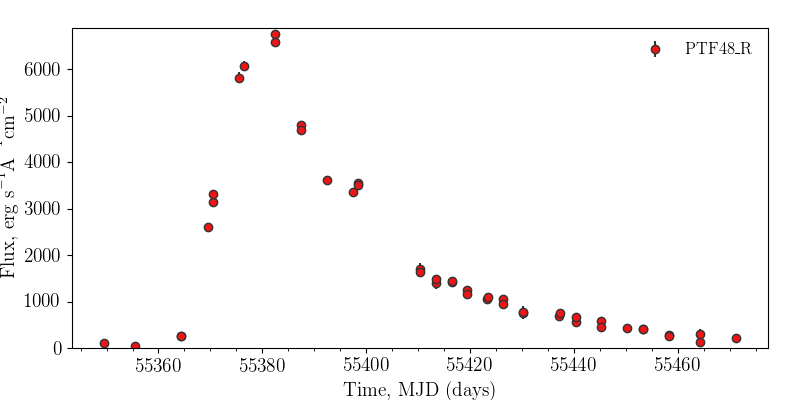

In [4]:
data_path = "/Users/berto/data/cfro_SNe_orig.dat"
p = pcc.PhotometryClass()
p.load(data_path)
p.plot()

In [8]:
sn = pcc.SNClass("Cfro_SNe_orig")
sn.load_phot(path=data_path, verbose=True)

/Users/berto/data/cfro_SNe_orig.dat


In [9]:
x = sn.phot.phot

In [10]:
x["ptfzp"] = 27.

In [11]:
x["m"] = -2.5*np.log10(x["flux"])+x["ptfzp"]

/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [29]:
zp = pcc.kcorr.calc_AB_zp("PTF48_R")
x["PTFR_AB_zp"] = zp

In [13]:
scaling = np.nanmean(x["flux"]/np.power(10., -(x["m"]+x["PTFR_AB_zp"])/2.5))
print(scaling)

2.49111906972e+19


In [14]:
x["flux"] = x["flux"]/scaling
x["flux_err"] = x["flux_err"]/scaling

In [15]:
x.show_in_notebook()

idx,MJD,flux,flux_err,filter,ptfzp,m,PTFR_AB_zp
,d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,,erg / (Angstrom cm2 s),
0,55349.44,-7.75956486182e-18,3.84164695952e-18,PTF48_R,27.0,nan,21.4909862158
1,55349.4834,3.909889382e-18,3.98616032477e-18,PTF48_R,27.0,22.0286026078,21.4909862158
2,55355.4071,-6.42281623327e-18,2.67751151724e-18,PTF48_R,27.0,nan,21.4909862158
3,55355.4512,1.49330477424e-18,2.18777177946e-18,PTF48_R,27.0,23.0736426503,21.4909862158
4,55363.4624,-5.83673425198e-18,2.19981455989e-18,PTF48_R,27.0,nan,21.4909862158
5,55364.3825,1.01079070471e-17,2.66546873681e-18,PTF48_R,27.0,20.9973606856,21.4909862158
6,55364.4266,1.0681946248e-17,2.44067016864e-18,PTF48_R,27.0,20.9373878136,21.4909862158
7,55369.4563,1.0463971922e-16,2.66145447666e-18,PTF48_R,27.0,18.4597723701,21.4909862158
8,55370.4052,1.26296652707e-16,3.26359349853e-18,PTF48_R,27.0,18.2555341832,21.4909862158


In [16]:
y = x[["MJD", "flux", "flux_err", "filter"]]

In [17]:
y

MJD,flux,flux_err,filter
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,str7
55349.44,-7.75956486182e-18,3.84164695952e-18,PTF48_R
55349.4834,3.909889382e-18,3.98616032477e-18,PTF48_R
55355.4071,-6.42281623327e-18,2.67751151724e-18,PTF48_R
55355.4512,1.49330477424e-18,2.18777177946e-18,PTF48_R
55363.4624,-5.83673425198e-18,2.19981455989e-18,PTF48_R
55364.3825,1.01079070471e-17,2.66546873681e-18,PTF48_R
55364.4266,1.0681946248e-17,2.44067016864e-18,PTF48_R
55369.4563,1.0463971922e-16,2.66145447666e-18,PTF48_R


In [18]:
p = pcc.PhotometryClass()
p.load_table(y)

In [19]:
p.save("PTF38093380.dat", path = "/Users/berto/projects/")

has data
/Users/berto/projects/PTF38093380.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:780: UserWarning: Found existing file matching /Users/berto/projects/PTF38093380.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + outpath + ". Run with squash = True to overwrite")


<IPython.core.display.Javascript object>


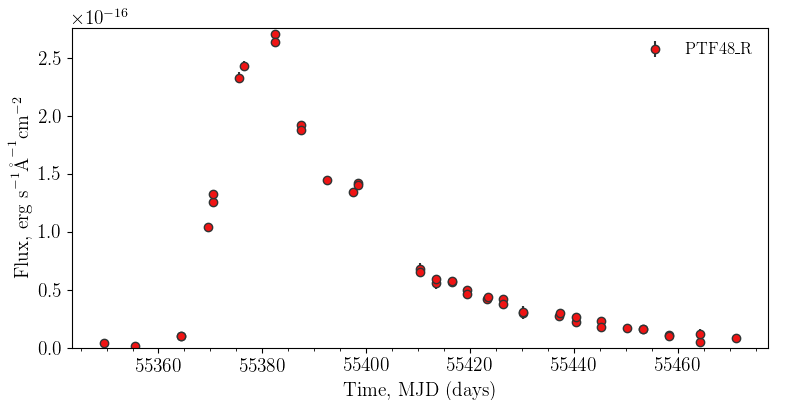

In [20]:
p.plot()

In [21]:
pcc.test_LCfit("PTF38093380")

/Users/berto/Code/CoCo/
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/PTF38093380.stat
Looks like you have done a fit, I found  /Users/berto/Code/CoCo/recon/PTF38093380.dat


True

In [ ]:
pcc.run_LCfit("/Users/berto/projects/PTF38093380.dat")

In [23]:
sn = pcc.SNClass("PTF38093380")
sn.load_phot(path="/Users/berto/projects/PTF38093380.dat")
sn.get_lcfit(os.path.join(pcc._default_coco_dir_path, "recon/" + sn.name + ".dat"))

<IPython.core.display.Javascript object>


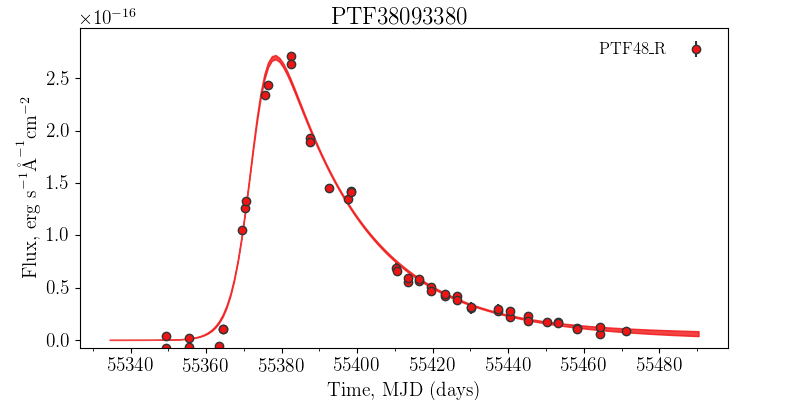

In [24]:
sn.get_lcfit(os.path.join(pcc._default_coco_dir_path, "recon/" + sn.name + ".dat"))
sn.plot_lc(multiplot=False, showsnname=True)

<IPython.core.display.Javascript object>


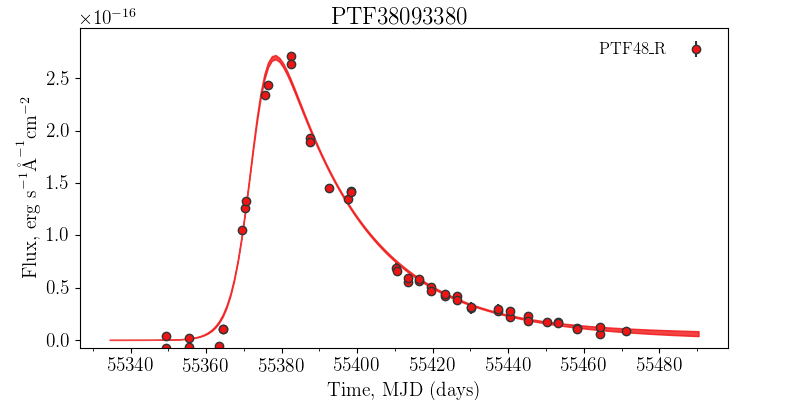

In [25]:
sn.plot_lc(multiplot=False, showsnname=True, savepdf=True, outpath="/Users/berto/projects/PTF38093380")

## Peak Absolute Magnitude and Distance
---
 Li et al. 2011 (https://ui.adsabs.harvard.edu/#abs/2011MNRAS.412.1441L/abstract) typical Ibc peak abs mag ~-17, faintest~-14,  brightest are -18


In [37]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

In [28]:
max_flux = pcc.utils.get_mjdmax_flux(sn, "PTF48_R")
print(max_flux)

2.70200441684e-16


In [34]:
m_app = -2.5*np.log10(max_flux)-zp
print(m_app)

17.4297986477


In [36]:
M_typical = -17.0
M_bright = -18.0
M_faint = -14.0

mu_typical = m_app - M_typical
mu_bright = m_app - M_bright
mu_faint = m_app - M_faint

print(mu_bright, mu_typical, mu_faint)

35.4297986477 34.4297986477 31.4297986477


In [41]:
d = Distance(distmod=[mu_bright, mu_typical, mu_faint])

In [42]:
d

<Distance [ 121.8876572 ,  76.90591251,  19.31789181] Mpc>

In [44]:
[dist.z for dist in d]

[0.027591608205568319, 0.017542541938861154, 0.0044512797921614821]